#Proyecto: PRY20241034
Modelo Predictivo para la optimización de inventario de empresas medianas del sector industrial en Lima usando Machine Learning


In [ ]:
from google.colab import drive
import joblib
drive.mount('/content/drive')

Mounted at /content/drive


##Extracción, Carga y Preparación de los Datos
Este bloque corresponde a la carga de los datos y la preparación inicial, que incluye la eliminación de valores nulos y la fusión de datasets relevantes.

In [ ]:
# Importar las librerías necesarias
import pandas as pd

In [ ]:
# Cargar los archivos CSV
train = pd.read_csv('train.csv')
product = pd.read_csv('products.csv', encoding='latin-1')
storage = pd.read_csv('storage.csv')
test = pd.read_csv('test.csv')


In [ ]:
# Visualizar las primeras filas de cada dataset
train.head()

,id,month,week,storage_id,product_id,base_price,checkout_price,social_media_promotion,homepage_featured,num_orders
0,23854,1,1,103,21093674,166.26,177.67,0,0,2
1,23855,1,1,102,21132395,2256.24,2388.96,0,0,1
2,23856,1,1,102,21044341,103.00,108.00,0,0,1
3,23857,1,1,102,21072631,1657.50,1787.50,0,0,1
4,23858,1,1,103,21101852,749.84,815.36,0,0,2


In [ ]:
test.head()

,id,month,week,storage_id,product_id,base_price,checkout_price,social_media_promotion,homepage_featured
0,36603,10,37,101,21011031,1702.38,1872.62,0,0
1,36604,10,37,101,21010896,362.59,398.85,0,0
2,36605,10,37,102,21011022,1271.02,1372.70,0,1
3,36606,10,37,101,21011095,1724.22,1965.61,0,1
4,36607,10,37,101,21011128,305.02,338.57,0,1


In [ ]:
product.head()

,master_line,family,subfamily,category,product_id,description
0,Herramientas Industriales,21 HERRAMIENTAS Y EQ. ELECTRICOS Y ACC.,"01 TALADROS, DESARMADORES ELECT. Y ACC.",TALADROS Y DESARMADORES ELECTRICOS,21010880,ATORNILLADOR 12V DCD700C2-B2 ( INCLUYE 2 BATE...
1,Herramientas Industriales,21 HERRAMIENTAS Y EQ. ELECTRICOS Y ACC.,"01 TALADROS, DESARMADORES ELECT. Y ACC.",TALADROS Y DESARMADORES ELECTRICOS,21010881,ATORNILLADOR DE IMPACTO BARETOOL 12V BOSCH GDR...
2,Herramientas Industriales,21 HERRAMIENTAS Y EQ. ELECTRICOS Y ACC.,"01 TALADROS, DESARMADORES ELECT. Y ACC.",TALADROS Y DESARMADORES ELECTRICOS,21010882,ATORNILLADOR DE IMPACTO BARETOOL 12V BOSCH GDR...
3,Herramientas Industriales,21 HERRAMIENTAS Y EQ. ELECTRICOS Y ACC.,"01 TALADROS, DESARMADORES ELECT. Y ACC.",TALADROS Y DESARMADORES ELECTRICOS,21010883,ATORNILLADOR INALAMBRICO 12V BOSCH GSR 1000 SMART
4,Herramientas Industriales,21 HERRAMIENTAS Y EQ. ELECTRICOS Y ACC.,"01 TALADROS, DESARMADORES ELECT. Y ACC.",TALADROS Y DESARMADORES ELECTRICOS,21010884,ATORNILLADOR DE IMPACTO 18V 4 VEL/175 NM A-MOD...


In [ ]:
storage.head()

,storage_id,region,city,storage_type
0,101,LIMA SUR,CHORRILLOS,STR_LMS
1,102,AREQUIPA,AREQUIPA,STR_ARQ
2,103,LIMA,LIMA,STR_LMA


In [ ]:
#Crear nuevo dataframe basado en train sin valor target
test2 = train.drop('num_orders', axis = 1)
test2

,id,month,week,storage_id,product_id,base_price,checkout_price,social_media_promotion,homepage_featured
0,23854,1,1,103,21093674,166.26,177.67,0,0
1,23855,1,1,102,21132395,2256.24,2388.96,0,0
2,23856,1,1,102,21044341,103.00,108.00,0,0
3,23857,1,1,102,21072631,1657.50,1787.50,0,0
4,23858,1,1,103,21101852,749.84,815.36,0,0
...,...,...,...,...,...,...,...,...,...
12745,36599,10,37,103,21072633,1265.87,1351.90,0,0
12746,36600,10,37,101,21011121,458.54,508.48,0,0
12747,36601,10,37,101,21021673,821.10,877.45,0,0
12748,36602,10,37,102,21093713,688.50,762.75,0,0


In [ ]:
# Visualizar las cantidad de registros y campos de cada dataset
train.shape

(12750, 10)

In [ ]:
test.shape

(2000, 9)

In [ ]:
product.shape

(1942, 6)

In [ ]:
storage.shape

(3, 4)

In [ ]:
# Fusionar los datos de productos y almacenes con el dataset de entrenamiento y prueba
def join(data_1, data_2, common_feature):
    merged_data = pd.merge(left=data_1, right=data_2,
    how="left", left_on=common_feature, right_on=common_feature)
    return merged_data

In [ ]:
# Fusión con el dataset de productos y almacenes
train = join(train, product[['product_id', 'category']], 'product_id')
train = join(train, storage[['storage_id', 'city', 'storage_type']], 'storage_id')

In [ ]:
train.head()

,id,month,week,storage_id,product_id,base_price,checkout_price,social_media_promotion,homepage_featured,num_orders,category,city,storage_type
0,23854,1,1,103,21093674,166.26,177.67,0,0,2,LLAVES DE IMPACTO,LIMA,STR_LMA
1,23855,1,1,102,21132395,2256.24,2388.96,0,0,1,REPUESTOS PARA EQUIPOS,AREQUIPA,STR_ARQ
2,23856,1,1,102,21044341,103.00,108.00,0,0,1,LIJADORAS,AREQUIPA,STR_ARQ
3,23857,1,1,102,21072631,1657.50,1787.50,0,0,1,MOTOSIERRAS,AREQUIPA,STR_ARQ
4,23858,1,1,103,21101852,749.84,815.36,0,0,2,MOTORES ELECTRICOS,LIMA,STR_LMA


In [ ]:
# Visualizar los datos después de las fusiones y modificaciones
train.shape

(12750, 13)

In [ ]:
test = join(test, product[['product_id', 'category']], 'product_id')
test = join(test, storage[['storage_id', 'city', 'storage_type']], 'storage_id')

test2 = join(test2, product[['product_id', 'category']], 'product_id')
test2 = join(test2, storage[['storage_id', 'city', 'storage_type']], 'storage_id')

In [ ]:
test.head()

,id,month,week,storage_id,product_id,base_price,checkout_price,social_media_promotion,homepage_featured,category,city,storage_type
0,36603,10,37,101,21011031,1702.38,1872.62,0,0,TALADROS Y DESARMADORES ELECTRICOS,CHORRILLOS,STR_LMS
1,36604,10,37,101,21010896,362.59,398.85,0,0,TALADROS Y DESARMADORES ELECTRICOS,CHORRILLOS,STR_LMS
2,36605,10,37,102,21011022,1271.02,1372.70,0,1,TALADROS Y DESARMADORES ELECTRICOS,AREQUIPA,STR_ARQ
3,36606,10,37,101,21011095,1724.22,1965.61,0,1,ACCESORIOS,CHORRILLOS,STR_LMS
4,36607,10,37,101,21011128,305.02,338.57,0,1,ACCESORIOS,CHORRILLOS,STR_LMS


In [ ]:
# Eliminar las filas que contienen valores nulos
train = train.dropna()
test = test.dropna()
test2 = test2.dropna()

In [ ]:
# Verificar si hay valores nulos
train.isnull().sum()
test.isnull().sum()

,0
id,0
month,0
week,0
storage_id,0
product_id,0
base_price,0
checkout_price,0
social_media_promotion,0
homepage_featured,0


In [ ]:
# Eliminar la columna 'base_price' ya que es irrelevante para el análisis
train.drop('base_price', axis=1, inplace=True)
test.drop('base_price', axis=1, inplace=True)

In [ ]:
test2.drop('base_price', axis=1, inplace=True)

## Visualizando la Data para ver más Insights


In [ ]:
# Importar librerías para la visualización
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='count', ylabel='category'>

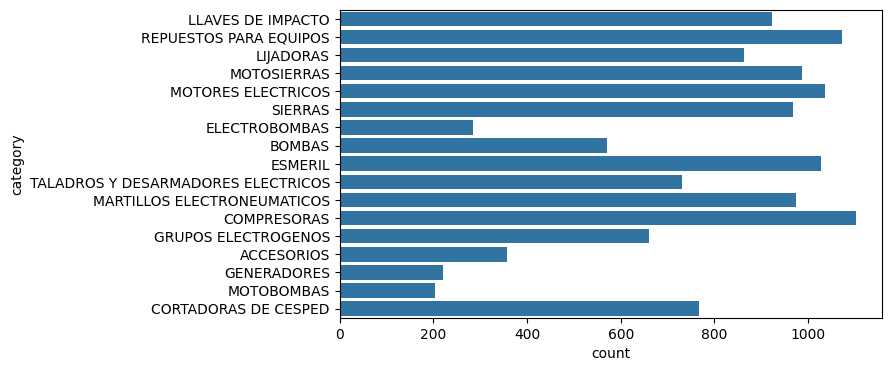

In [ ]:
# Gráficos de insights
plt.figure(figsize=(7,4))
sns.countplot(train['category'])

<Axes: xlabel='count', ylabel='city'>

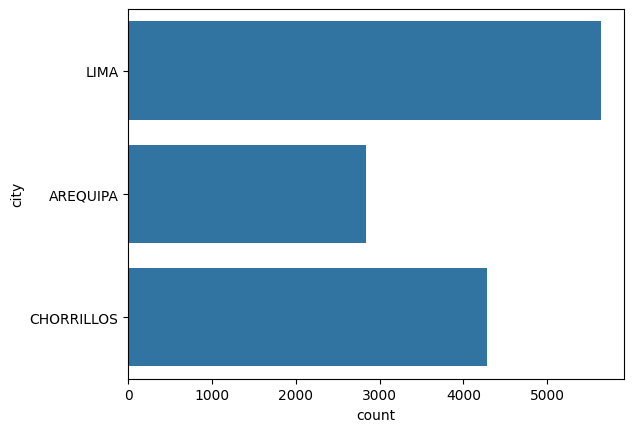

In [ ]:
sns.countplot(train['city'])

<Axes: xlabel='count', ylabel='storage_type'>

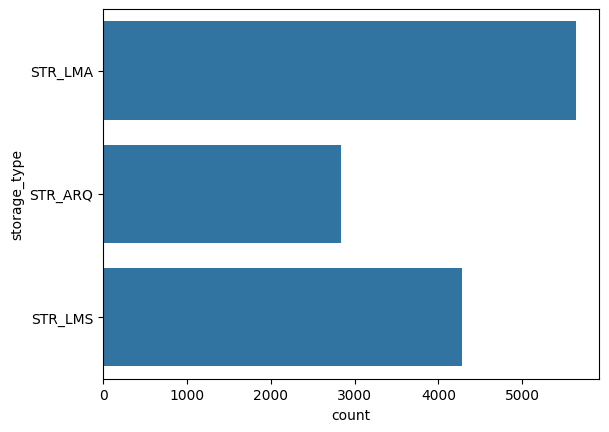

In [ ]:
sns.countplot(train['storage_type'])

## Transformación y Creación de Variables
Aquí se crean variables categóricas mediante dummies y se añaden etiquetas de clústeres con KMeans.

In [ ]:
# Crear dummies para las variables categóricas (categoría, ciudad, tipo de almacenamiento)
def process_catagorical_vars(data):
    cat_dummies = pd.get_dummies(data['category'])
    city_dummies = pd.get_dummies(data['city'])
    storage_type_dummies = pd.get_dummies(data['storage_type'])

    data.drop(['category', 'city', 'storage_type'], axis=1, inplace=True)
    return pd.concat([data, city_dummies, storage_type_dummies, cat_dummies], axis=1)

In [ ]:
# Aplicar la transformación a los datasets
train = process_catagorical_vars(train)
test = process_catagorical_vars(test)
test2 = process_catagorical_vars(test2)

In [ ]:
train.columns , test.columns

(Index(['id', 'month', 'week', 'storage_id', 'product_id', 'checkout_price',
        'social_media_promotion', 'homepage_featured', 'num_orders', 'AREQUIPA',
        'CHORRILLOS', 'LIMA', 'STR_ARQ', 'STR_LMA', 'STR_LMS', 'ACCESORIOS',
        'BOMBAS', 'COMPRESORAS', 'CORTADORAS DE CESPED', 'ELECTROBOMBAS',
        'ESMERIL', 'GENERADORES', 'GRUPOS ELECTROGENOS', 'LIJADORAS',
        'LLAVES DE IMPACTO', 'MARTILLOS ELECTRONEUMATICOS', 'MOTOBOMBAS',
        'MOTORES ELECTRICOS', 'MOTOSIERRAS', 'REPUESTOS PARA EQUIPOS',
        'SIERRAS', 'TALADROS Y DESARMADORES ELECTRICOS'],
       dtype='object'),
 Index(['id', 'month', 'week', 'storage_id', 'product_id', 'checkout_price',
        'social_media_promotion', 'homepage_featured', 'AREQUIPA', 'CHORRILLOS',
        'LIMA', 'STR_ARQ', 'STR_LMA', 'STR_LMS', 'ACCESORIOS', 'BOMBAS',
        'COMPRESORAS', 'CORTADORAS DE CESPED', 'ELECTROBOMBAS', 'ESMERIL',
        'GENERADORES', 'GRUPOS ELECTROGENOS', 'LIJADORAS', 'LLAVES DE IMPACTO',
        

## Análisis Exploratorio con Gráficos

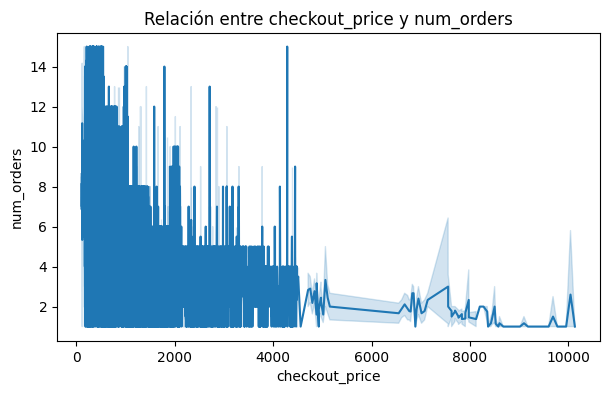

In [ ]:
# Graficar la relación entre precio y número de pedidos
plt.figure(figsize=(7,4))
sns.lineplot(x="checkout_price", y="num_orders", data=train)
plt.title("Relación entre checkout_price y num_orders")
plt.show()

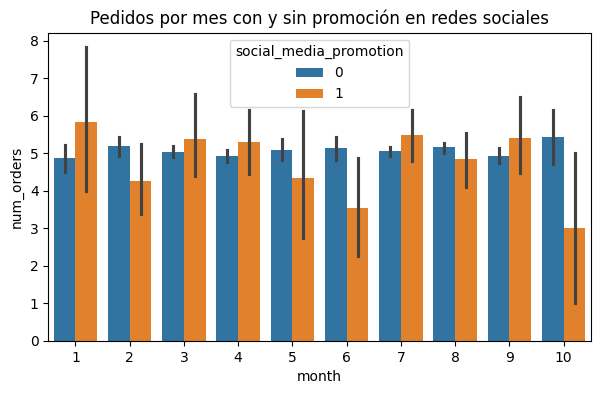

In [ ]:
# Graficar la relación entre meses, promociones y número de pedidos
plt.figure(figsize=(7, 4))
sns.barplot(x='month', y='num_orders', hue='social_media_promotion', data=train)
plt.title("Pedidos por mes con y sin promoción en redes sociales")
plt.show()


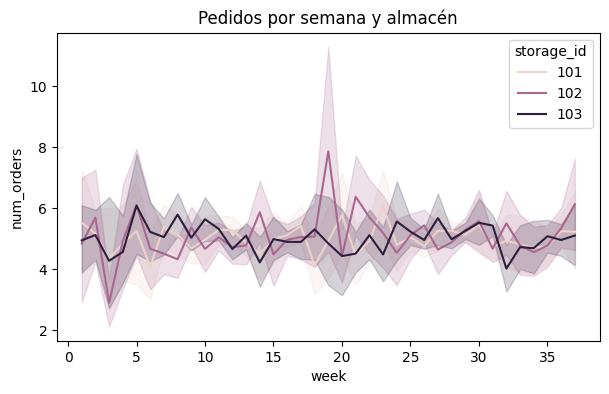

In [ ]:
# Graficar la relación entre semanas, almacenes y número de pedidos
plt.figure(figsize=(7, 4))
sns.lineplot(x='week', y='num_orders', hue='storage_id', data=train)
plt.title("Pedidos por semana y almacén")
plt.show()

In [ ]:
# Correlación entre variables
corr = train.corr()
corr

,id,month,week,storage_id,product_id,checkout_price,social_media_promotion,homepage_featured,num_orders,AREQUIPA,...,GRUPOS ELECTROGENOS,LIJADORAS,LLAVES DE IMPACTO,MARTILLOS ELECTRONEUMATICOS,MOTOBOMBAS,MOTORES ELECTRICOS,MOTOSIERRAS,REPUESTOS PARA EQUIPOS,SIERRAS,TALADROS Y DESARMADORES ELECTRICOS
id,1.000000,0.974206,0.981838,-0.007519,-0.000640,-0.010916,0.012001,-0.007593,0.003303,-0.001049,...,-0.030836,0.000164,-0.001450,-0.001155,0.001405,0.003150,-0.001295,0.009057,-0.005604,0.003989
month,0.974206,1.000000,0.991730,-0.006508,0.000488,-0.013391,0.013070,-0.001775,0.006463,-0.001099,...,-0.035286,-0.002413,0.000472,-0.003135,0.003272,0.007312,-0.002253,0.008365,-0.008504,0.001216
week,0.981838,0.991730,1.000000,-0.007702,-0.000728,-0.013280,0.011815,-0.002974,0.005108,-0.000360,...,-0.034867,-0.000999,-0.000857,-0.002904,0.002930,0.004312,-0.002395,0.010447,-0.007491,0.003220
storage_id,-0.007519,-0.006508,-0.007702,1.000000,0.008386,0.006609,-0.004421,-0.000188,0.004781,-0.064812,...,0.001133,0.006860,-0.002772,-0.009621,-0.021178,0.017370,0.005463,0.012963,0.000407,-0.010261
product_id,-0.000640,0.000488,-0.000728,0.008386,1.000000,0.438901,0.002502,0.124751,-0.199454,-0.014352,...,0.300832,-0.195837,0.154017,-0.080563,0.137160,0.226550,0.001549,0.470835,-0.302149,-0.392106
checkout_price,-0.010916,-0.013391,-0.013280,0.006609,0.438901,1.000000,0.008765,0.024047,-0.406671,-0.009216,...,0.682323,-0.219220,-0.156370,-0.017376,-0.005134,-0.085586,-0.069029,0.159001,-0.100880,-0.080634
social_media_promotion,0.012001,0.013070,0.011815,-0.004421,0.002502,0.008765,1.000000,-0.013574,0.002002,-0.010256,...,0.000797,0.004749,-0.003702,0.007414,-0.005233,-0.006850,-0.014986,0.003207,0.000021,-0.009230
homepage_featured,-0.007593,-0.001775,-0.002974,-0.000188,0.124751,0.024047,-0.013574,1.000000,-0.018839,-0.004518,...,-0.008819,-0.031525,-0.038181,-0.035535,0.051061,0.107598,-0.032115,0.091675,-0.027575,-0.028925
num_orders,0.003303,0.006463,0.005108,0.004781,-0.199454,-0.406671,0.002002,-0.018839,1.000000,-0.002491,...,-0.195451,0.200851,0.106645,-0.063598,-0.018287,0.024517,-0.005107,-0.095168,0.031989,0.020744
AREQUIPA,-0.001049,-0.001099,-0.000360,-0.064812,-0.014352,-0.009216,-0.010256,-0.004518,-0.002491,1.000000,...,-0.012612,0.002320,0.001446,-0.003241,-0.001973,-0.003532,-0.009895,-0.006874,0.000705,-0.000299



Asignamos el campo id como índice en train, test, y test2.

In [ ]:
train['id'].nunique()

12750

In [ ]:
# Función para establecer el índice
def set_index(data):
    data.set_index('id', inplace=True)

In [ ]:
# Establecer índice
set_index(train)
set_index(test)
set_index(test2)

In [ ]:
train.head()

,month,week,storage_id,product_id,checkout_price,social_media_promotion,homepage_featured,num_orders,AREQUIPA,CHORRILLOS,...,GRUPOS ELECTROGENOS,LIJADORAS,LLAVES DE IMPACTO,MARTILLOS ELECTRONEUMATICOS,MOTOBOMBAS,MOTORES ELECTRICOS,MOTOSIERRAS,REPUESTOS PARA EQUIPOS,SIERRAS,TALADROS Y DESARMADORES ELECTRICOS
id,,,,,,,,,,,,,,,,,,,,,
23854,1,1,103,21093674,177.67,0,0,2,False,False,...,False,False,True,False,False,False,False,False,False,False
23855,1,1,102,21132395,2388.96,0,0,1,True,False,...,False,False,False,False,False,False,False,True,False,False
23856,1,1,102,21044341,108.00,0,0,1,True,False,...,False,True,False,False,False,False,False,False,False,False
23857,1,1,102,21072631,1787.50,0,0,1,True,False,...,False,False,False,False,False,False,True,False,False,False
23858,1,1,103,21101852,815.36,0,0,2,False,False,...,False,False,False,False,False,True,False,False,False,False


##Creación de Clusters (KMeans)

In [ ]:
# Crear clústeres (etiquetas) usando KMeans
from sklearn.cluster import KMeans

In [ ]:
def create_clusters(data):
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(data)
    return kmeans.labels_

In [ ]:
# Aplicamos clustering
train['labels'] = create_clusters(train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
train['labels']

,labels
id,
23854,3
23855,0
23856,1
23857,4
23858,3
...,...
36599,4
36600,2
36601,2


In [ ]:
test['labels'] = create_clusters(test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
test2['labels'] = create_clusters(test2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Visualizar el resultado con las nuevas columnas
train.head()
test.head()

,month,week,storage_id,product_id,checkout_price,social_media_promotion,homepage_featured,AREQUIPA,CHORRILLOS,LIMA,...,LIJADORAS,LLAVES DE IMPACTO,MARTILLOS ELECTRONEUMATICOS,MOTOBOMBAS,MOTORES ELECTRICOS,MOTOSIERRAS,REPUESTOS PARA EQUIPOS,SIERRAS,TALADROS Y DESARMADORES ELECTRICOS,labels
id,,,,,,,,,,,,,,,,,,,,,
36603,10,37,101,21011031,1872.62,0,0,False,True,False,...,False,False,False,False,False,False,False,False,True,2
36604,10,37,101,21010896,398.85,0,0,False,True,False,...,False,False,False,False,False,False,False,False,True,2
36605,10,37,102,21011022,1372.70,0,1,True,False,False,...,False,False,False,False,False,False,False,False,True,2
36606,10,37,101,21011095,1965.61,0,1,False,True,False,...,False,False,False,False,False,False,False,False,False,2
36607,10,37,101,21011128,338.57,0,1,False,True,False,...,False,False,False,False,False,False,False,False,False,2


##Entrenamiento y Evaluación del Modelo
Este bloque de código entrena el modelo de Random Forest, lo evalúa y calcula métricas como MAE, MSE, y R².

In [ ]:
# Importar las librerías para el modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# Dividir los datos en entrenamiento y validación
def train_val_split(data):
    train,val= train_test_split(data,test_size =0.2, random_state=112)
    return train,val

train,val = train_val_split(train)

In [ ]:
# Separar características y target
def x_y_split(data,target_var):
    x = data.drop(target_var , axis = 1 )
    y = data[target_var]
    return x , y

x_train , y_train = x_y_split(train,'num_orders')
x_val , y_val = x_y_split(val,'num_orders')

In [ ]:
# Aplicamos la normalización a las características numéricas utilizando StandardScaler.
from sklearn.preprocessing import StandardScaler

def scale(data):
    scaler = StandardScaler()
    scaler.fit(data)
    scaler.transform(data)

scale(x_train)
scale(test)

In [ ]:
# Entrenamiento del modelo
model = RandomForestRegressor(n_estimators=20, random_state=0)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [ ]:
reg_test = RandomForestRegressor(n_estimators = 20, random_state = 0)
reg_test.fit(x_val , y_val)

RandomForestRegressor(n_estimators=20, random_state=0)

In [ ]:
# Predicciones
y_train_pred = model.predict(x_train)
y_val_pred = reg_test.predict(x_val)

In [ ]:
x_train.shape

(10200, 31)

In [ ]:
x_val.shape

(2550, 31)

## Evaluación del modelo

In [ ]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

RMSLE para el conjunto de datos de entrenamiento

In [ ]:
# Calcular RMSLE
rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
rmsle_train

0.256523564902111

<ipython-input-40-2c8c47b85f22>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_pred) , sns.distplot(train['num_orders']) #BLUE : valores predecidos , ORANGE: valores originales
<ipython-input-40-2c8c47b85f22>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_pred) , sns.distplot

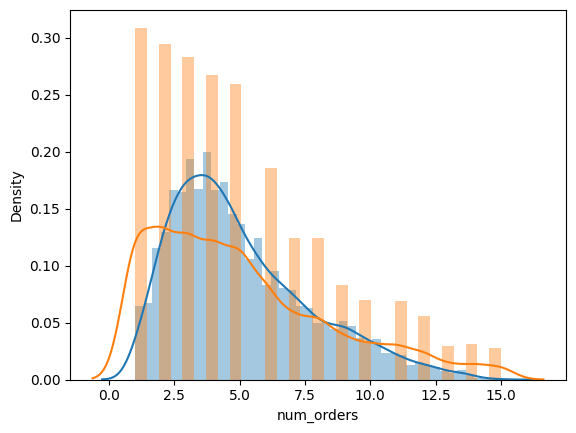

In [ ]:
sns.distplot(y_train_pred) , sns.distplot(train['num_orders']) #BLUE : valores predecidos , ORANGE: valores originales

# Guardar el gráfico como un archivo PNG
plt.savefig('grafic_train.png')

RMSLE para conjunto de datos de validación

In [ ]:
rmsle_val = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
rmsle_val

0.2593494430149374

<ipython-input-42-4e641258b334>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val_pred) , sns.distplot(val['num_orders']) #BLUE: Predicted values , ORANGE: Original Values
<ipython-input-42-4e641258b334>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val_pred) , sns.distplot(val['num_or

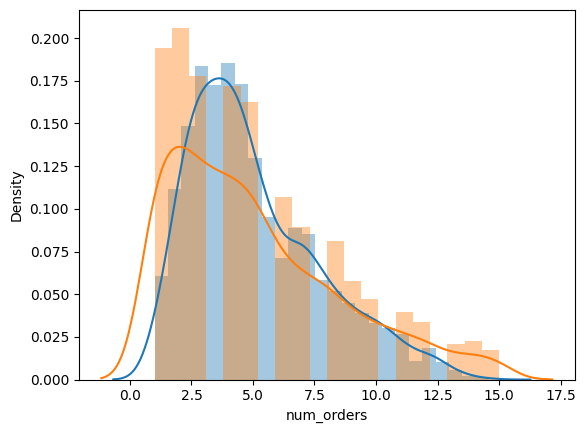

In [ ]:
sns.distplot(y_val_pred) , sns.distplot(val['num_orders']) #BLUE: Predicted values , ORANGE: Original Values

# Guardar el gráfico como un archivo PNG
plt.savefig('grafic_validation.png')

##Métricas de validación

In [ ]:
# Calculando MAE
train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)

In [ ]:
# Calcula el error cuadrático medio
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

In [ ]:
# Calcula el coeficiente de determinación (R-cuadrado)
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

In [ ]:
print("Métricas de entrenamiento:")
print("MSE (Error cuadrático medio):", mse_train)
print("MAE (Error absoluto medio):", train_mae)
print("R2 Score:", r2_train)
print("\nMétricas de validación:")
print("MSE (Error cuadrático medio):", mse_val)
print("MAE (Error absoluto medio):", val_mae)
print("R2 Score:", r2_val)

Métricas de entrenamiento:
MSE (Error cuadrático medio): 1.6222806459699621
MAE (Error absoluto medio): 0.9471096405228758
R2 Score: 0.8629852157171851

Métricas de validación:
MSE (Error cuadrático medio): 1.600204542211329
MAE (Error absoluto medio): 0.9440800653594771
R2 Score: 0.8662719421186111


##Exportación de Resultados
Exportamos las predicciones realizadas en el conjunto de datos test y train a archivos CSV.

In [ ]:
# Generar predicciones finales en test
pred_test = model.predict(test)

In [ ]:
resultado_test = pd.read_csv('test.csv')
resultado_test = join(resultado_test,product[['product_id', 'category']], 'product_id')
resultado_test = join(resultado_test,storage[['storage_id','city', 'storage_type']],'storage_id')

In [ ]:
# Asignar predicciones a los datasets
resultado_test = resultado_test.assign(num_orders=pred_test)

In [ ]:
resultado_test

,id,month,week,storage_id,product_id,base_price,checkout_price,social_media_promotion,homepage_featured,category,city,storage_type,num_orders
0,36603,10,37,101,21011031,1702.38,1872.62,0,0,TALADROS Y DESARMADORES ELECTRICOS,CHORRILLOS,STR_LMS,4.25
1,36604,10,37,101,21010896,362.59,398.85,0,0,TALADROS Y DESARMADORES ELECTRICOS,CHORRILLOS,STR_LMS,7.35
2,36605,10,37,102,21011022,1271.02,1372.70,0,1,TALADROS Y DESARMADORES ELECTRICOS,AREQUIPA,STR_ARQ,5.70
3,36606,10,37,101,21011095,1724.22,1965.61,0,1,ACCESORIOS,CHORRILLOS,STR_LMS,5.10
4,36607,10,37,101,21011128,305.02,338.57,0,1,ACCESORIOS,CHORRILLOS,STR_LMS,6.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,38598,12,44,103,21132592,2678.52,3026.73,0,0,REPUESTOS PARA EQUIPOS,LIMA,STR_LMA,4.10
1996,38599,12,44,103,21132322,2578.09,2939.02,0,0,REPUESTOS PARA EQUIPOS,LIMA,STR_LMA,3.10
1997,38600,12,44,102,21132496,8130.50,9106.16,0,0,REPUESTOS PARA EQUIPOS,AREQUIPA,STR_ARQ,1.00
1998,38601,12,44,103,21132175,1476.62,1639.05,0,0,REPUESTOS PARA EQUIPOS,LIMA,STR_LMA,3.45


In [ ]:
# Generar predicciones finales en train
resultado_train = pd.read_csv('train.csv')
resultado_train = join(resultado_train,product[['product_id', 'category']], 'product_id')
resultado_train = join(resultado_train,storage[['storage_id','city', 'storage_type']],'storage_id')

In [ ]:
pred_train = model.predict(test2)

In [ ]:
resultado_train = resultado_train.assign(num_orders_predict=pred_train)

In [ ]:
resultado_train

,id,month,week,storage_id,product_id,base_price,checkout_price,social_media_promotion,homepage_featured,num_orders,category,city,storage_type,num_orders_predict
0,23854,1,1,103,21093674,166.26,177.67,0,0,2,LLAVES DE IMPACTO,LIMA,STR_LMA,6.100000
1,23855,1,1,102,21132395,2256.24,2388.96,0,0,1,REPUESTOS PARA EQUIPOS,AREQUIPA,STR_ARQ,2.100000
2,23856,1,1,102,21044341,103.00,108.00,0,0,1,LIJADORAS,AREQUIPA,STR_ARQ,5.800000
3,23857,1,1,102,21072631,1657.50,1787.50,0,0,1,MOTOSIERRAS,AREQUIPA,STR_ARQ,2.400000
4,23858,1,1,103,21101852,749.84,815.36,0,0,2,MOTORES ELECTRICOS,LIMA,STR_LMA,4.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12745,36599,10,37,103,21072633,1265.87,1351.90,0,0,4,MOTOSIERRAS,LIMA,STR_LMA,4.066667
12746,36600,10,37,101,21011121,458.54,508.48,0,0,2,ACCESORIOS,CHORRILLOS,STR_LMS,2.200000
12747,36601,10,37,101,21021673,821.10,877.45,0,0,5,ESMERIL,CHORRILLOS,STR_LMS,8.200000
12748,36602,10,37,102,21093713,688.50,762.75,0,0,2,LLAVES DE IMPACTO,AREQUIPA,STR_ARQ,5.000000


In [ ]:
# Guardar el DataFrame resultante como un archivo CSV
resultado_test.to_csv('/content/drive/MyDrive/Resultado_test.csv', index=False)


In [ ]:
resultado_train.to_csv('/content/drive/MyDrive/Resultado_train.csv', index=False)